In [1]:
import numpy as np 
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(22)

In [3]:
df=pd.read_csv(r"C:\Users\adapa\Downloads\fmnist_small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


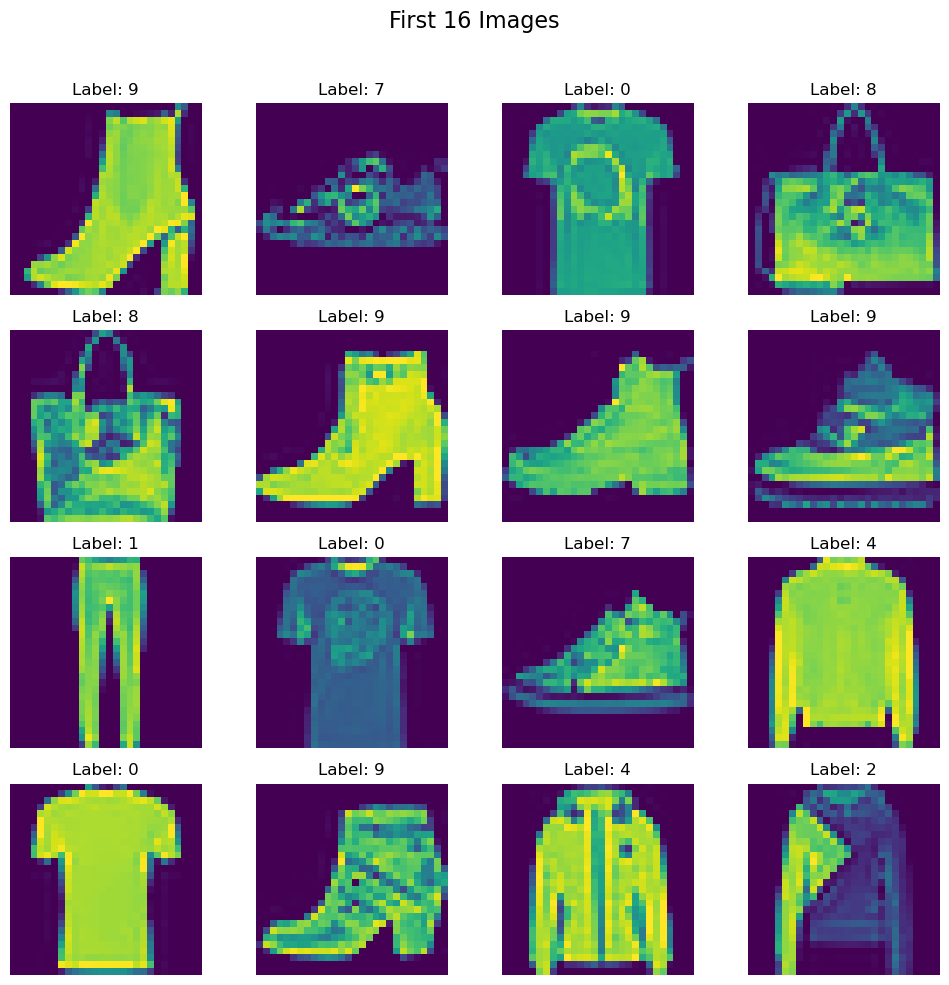

In [4]:
import matplotlib.pyplot as plt

# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis("off")  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [5]:
x=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [6]:
# x=df.drop("label",axis=1)
# y=df["label"]

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [8]:
x_train=x_train/255.0
x_test=x_test/255.0

In [9]:
x_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [10]:
from torch.utils.data import Dataset,DataLoader

In [11]:
class Customdataset(Dataset):
    def __init__(self,features,labels):
        self.features=torch.tensor(features,dtype=torch.float32)
        self.labels=torch.tensor(labels,dtype=torch.long)

    def __len__(self):
        
    
        return len(self.features)

    def __getitem__(self,index):
        return self.features[index],self.labels[index]
        

In [12]:
train_dataset=Customdataset(x_train,y_train)
test_dataset=Customdataset(x_test,y_test)

In [13]:
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=True)

In [17]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.network=nn.Sequential(
            nn.Linear(num_features,389),
            nn.ReLU(),
            nn.Linear(389,174),
            nn.ReLU(),
            nn.Linear(174,92),
            nn.ReLU(),
            nn.Linear(92,50),
            nn.ReLU(),
            nn.Linear(50,10),
        )
    def forward(self,features):
        out=self.network(features)

        return out

In [18]:
model=Model(x_train.shape[1])
optimizer=torch.optim.SGD(model.parameters(),lr=0.1)
loss_=nn.CrossEntropyLoss()

In [19]:
epochs=100
for epoch in range(epochs):
    total_epoch_loss=0
    for batch_features,batch_label in train_loader:
        y_pred=model(batch_features)
        loss=loss_(y_pred,batch_label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f"epoch:{epoch+1},loss:{loss.item()}")
        total_epoch_loss=  (total_epoch_loss)+loss.item()
    avg_loss=  total_epoch_loss/len(train_loader)
    print(f"Epoch{epoch+1},Loss:{avg_loss}")

epoch:1,loss:2.3207383155822754
epoch:1,loss:2.308556079864502
epoch:1,loss:2.3215601444244385
epoch:1,loss:2.3141379356384277
epoch:1,loss:2.3046631813049316
epoch:1,loss:2.3108878135681152
epoch:1,loss:2.307223081588745
epoch:1,loss:2.298633337020874
epoch:1,loss:2.2939999103546143
epoch:1,loss:2.2896718978881836
epoch:1,loss:2.2886197566986084
epoch:1,loss:2.299673557281494
epoch:1,loss:2.3296520709991455
epoch:1,loss:2.3089370727539062
epoch:1,loss:2.3121721744537354
epoch:1,loss:2.2954792976379395
epoch:1,loss:2.2870230674743652
epoch:1,loss:2.297480583190918
epoch:1,loss:2.3090598583221436
epoch:1,loss:2.3162529468536377
epoch:1,loss:2.2890431880950928
epoch:1,loss:2.2918527126312256
epoch:1,loss:2.3053178787231445
epoch:1,loss:2.2866907119750977
epoch:1,loss:2.299259662628174
epoch:1,loss:2.300204038619995
epoch:1,loss:2.290137767791748
epoch:1,loss:2.3086788654327393
epoch:1,loss:2.309351682662964
epoch:1,loss:2.2928600311279297
epoch:1,loss:2.288356065750122
epoch:1,loss:2.292

In [20]:
# Evaluation code
total = 0
correct = 0

with torch.no_grad():  # Disable gradient computation for evaluation
    for batch_features, batch_labels in test_loader:

        outputs = model(batch_features)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get predicted class

        total += batch_labels.shape[0]  # Count total samples
        correct += (predicted == batch_labels).sum().item()  # Count correct predictions

# Print accuracy
print(correct / total)  


0.8416666666666667
